In [49]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopy as gp
import seaborn as sns
from geopy.distance import vincenty
import statsmodels.formula.api as sm
from sklearn import linear_model

In [50]:
df = pd.read_csv("/Users/miroslava/Desktop/project/data.csv")

In [5]:
#QUESTION 1
#getting a look at if the data was imported correctly
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,695,6/1/13 0:00,6/1/13 0:11,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,6/1/13 0:00,6/1/13 0:11,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
2,2059,6/1/13 0:00,6/1/13 0:35,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0
3,123,6/1/13 0:01,6/1/13 0:03,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,6/1/13 0:01,6/1/13 0:26,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1


In [6]:
#analysing data
df.shape

(577703, 15)

In [7]:
#importing all libraries
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
577673    False
577674    False
577675    False
577676    False
577677    False
577678    False
577679    False
577680    False
577681    False
577682    False
577683    False
577684    False
577685    False
577686    False
577687    False
577688    False
577689    False
577690    False
577691    False
577692    False
577693    False
577694    False
577695    False
577696    False
577697    False
577698    False
577699    False
577700    False
577701    False
577702    False
Length: 577703, dtype: b

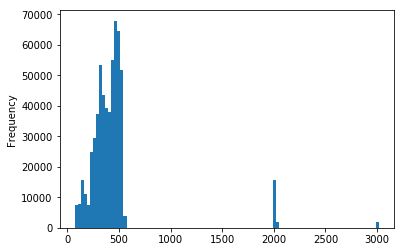

In [9]:
#frequency of all stations
df['start station id'].plot(kind="hist", bins = 100)
plt.show()

In [10]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,5.777030e+05,577703.000000,577703.000000,577703.000000,559644.000000,559644.000000,559644.000000,577703.000000,337382.000000,577703.000000
mean,1.372570e+03,439.228836,40.732436,-73.991251,441.910624,40.732146,-73.991244,17617.434516,1974.644945,0.710431
std,9.028063e+03,337.240318,0.021423,0.013002,345.448311,0.021507,0.013105,1677.518719,10.780255,0.678268
min,6.100000e+01,72.000000,40.646607,-74.017134,72.000000,40.646607,-74.017134,14529.000000,1899.000000,0.000000
25%,5.140000e+02,309.000000,40.717400,-74.001768,309.000000,40.716887,-74.001971,16161.000000,1968.000000,0.000000
50%,8.740000e+02,404.000000,40.734546,-73.990741,403.000000,40.734232,-73.990741,17638.000000,1977.000000,1.000000
75%,1.398000e+03,482.000000,40.749013,-73.981948,482.000000,40.748549,-73.981923,19066.000000,1983.000000,1.000000
max,3.876479e+06,3020.000000,40.771522,-73.950048,3020.000000,40.771522,-73.950048,20625.000000,1997.000000,2.000000


In [11]:
#frequency data in table format
data1 = df['start station name'].value_counts()
data1.head()

W 20 St & 11 Ave      5983
E 17 St & Broadway    5621
Broadway & W 58 St    5401
Broadway & E 14 St    5177
Broadway & W 24 St    4955
Name: start station name, dtype: int64

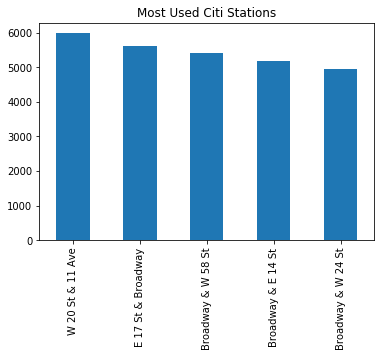

In [12]:
#frequency data in chart format
data1 = df['start station name'].value_counts()
data1.head(5).plot(kind='bar')
plt.title("Most Used Citi Stations")


In [13]:
#question2
#need to change the y axis to hours 


(array([     0.,   3396.,   5714.,   9525.,  13784.,  17273.,  20172.,
         22130.,  22681.,  22943.,  23087.,  22420.,  21605.,  20377.,
         19322.,  18617.,  17568.,  16645.,  16297.,  15418.,  14747.,
         14415.,  13714.,  13392.,  12890.,  12320.,  11918.,  11345.,
         10734.,  10404.,   9831.,   9112.,   8467.,   7807.,   7186.,
          6429.,   5702.,   5159.,   4526.,   4156.,   3707.,   3203.,
          3011.,   2694.,   2489.,   2226.,   1973.,   1850.,   1697.,
          1585.,   1306.,   1218.,   1172.,    996.,    899.,    828.,
           771.,    706.,    672.,    603.,    580.,    567.,    518.,
           500.,    473.,    441.,    424.,    435.,    403.,    331.,
           273.,    328.,    334.,    274.,    267.,    237.,    240.,
           249.,    227.,    203.,    230.,    178.,    227.,    213.,
           196.,    158.,    178.,    186.,    162.,    161.,    183.,
           129.,    136.,    163.,    146.,    118.,    133.,    129.,
      

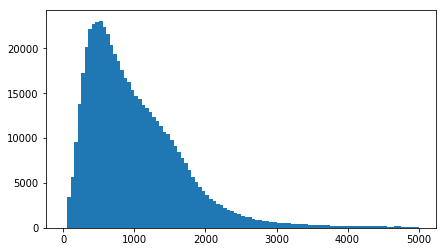

In [14]:
#general trip duration plot before separation 
plt.figure(figsize = (7,4))
plt.hist(df["tripduration"], range=[0, 5000], bins=100)

In [15]:
df2 = [["tripduration","usertype"]]

AttributeError: 'numpy.ndarray' object has no attribute 'distplot'

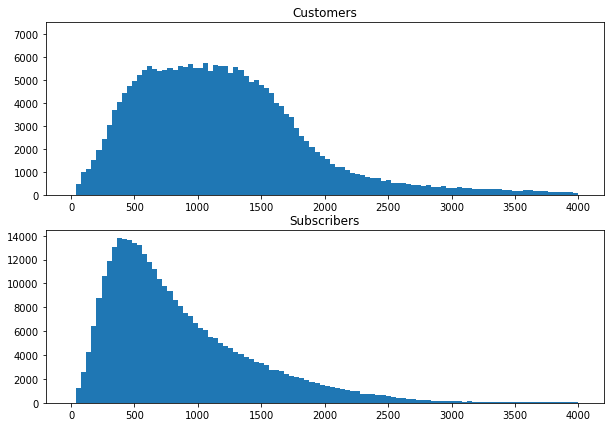

In [51]:
#breaking down the variable to display its two instances, customer and subscriber to display the plot. 
f, ax = plt.subplots(2,figsize= (10,7))
ax[0].hist(df[(df.usertype == "Customer")]["tripduration"], range = [0, 4000], bins = 100)
ax[0].set_ylim([0,7500])

ax[0].set_title("Customers")

ax[1].hist(df[(df.usertype == "Subscriber")]["tripduration"], range = [0, 4000], bins = 100, label = 'Subscribers')
ax[1].set_title("Subscribers")

ax.distplot(df['df2']/60)

In [15]:
#question 3
#graph looks like its taking the least popular destinations rather than the most?
#data2 = {'start station id':data1[:,0],'count':data1[:,1]}
#df2 = pd.DataFrame(data = data2)
#df2.head(5)
#df2.head(5)['start station id'].plot.barh()
#plt.show()

In [16]:
#initial data analysis- top station
df['start station name'].value_counts().idxmax()

'W 20 St & 11 Ave'

In [17]:
#top station and number of times used
df['start station name'].value_counts()[df['start station name'].value_counts() == df['start station name'].value_counts().max()]

W 20 St & 11 Ave    5983
Name: start station name, dtype: int64

In [ ]:
#initial data analysis
trip_series = df["start station id"].astype(str) + " to " + df["end station id"].astype(str)
trip_series.describe()

In [48]:
#cleaning up the data by dropping null values
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,695,6/1/13 0:00,6/1/13 0:11,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,6/1/13 0:00,6/1/13 0:11,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
3,123,6/1/13 0:01,6/1/13 0:03,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,6/1/13 0:01,6/1/13 0:26,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1
6,2057,6/1/13 0:02,6/1/13 0:36,285,Broadway & E 14 St,40.734546,-73.990741,532.0,S 5 Pl & S 5 St,40.710451,-73.960876,15693,Subscriber,1991.0,1
7,369,6/1/13 0:03,6/1/13 0:09,509,9 Ave & W 22 St,40.745497,-74.001971,521.0,8 Ave & W 31 St N,40.750967,-73.994442,16100,Subscriber,1981.0,1
8,1829,6/1/13 0:03,6/1/13 0:34,265,Stanton St & Chrystie St,40.722293,-73.991475,436.0,Hancock St & Bedford Ave,40.682166,-73.953990,15234,Subscriber,1984.0,1
9,829,6/1/13 0:04,6/1/13 0:18,404,9 Ave & W 14 St,40.740583,-74.005509,303.0,Mercer St & Spring St,40.723627,-73.999496,16400,Subscriber,1987.0,1
10,1316,6/1/13 0:04,6/1/13 0:26,423,W 54 St & 9 Ave,40.765849,-73.986905,314.0,Cadman Plaza West & Montague St,40.693830,-73.990539,19781,Subscriber,1960.0,1
12,386,6/1/13 0:05,6/1/13 0:11,241,DeKalb Ave & S Portland Ave,40.689810,-73.974931,365.0,Fulton St & Grand Ave,40.682232,-73.961458,19039,Subscriber,1981.0,1


In [49]:
#creating new collumn linking start and end station to count it as a trip
tripsdf= df.groupby(["start station name", "end station name"]).size().reset_index(name = 'Number of Trips')

In [50]:
#trip series variable to logically represent "to" and from a place
trip_series = df["start station name"].astype(str) + " to " + df["end station name"].astype(str)


In [51]:
#merging of dataframes
d = {'trips': trip_series}
trips = pd.DataFrame(data = d)
data_merged = trips.merge(right=tripsdf, how='inner',left_index = True, right_index=True, sort=False)


In [52]:
#merging of dataframes
data_merged.head(10)

,trips,start station name,end station name,Number of Trips
0,Broadway & W 24 St to 9 Ave & W 18 St,1 Ave & E 16 St,1 Ave & E 16 St,71
1,Broadway & W 24 St to 9 Ave & W 18 St,1 Ave & E 16 St,1 Ave & E 18 St,25
2,Hicks St & Montague St to Hicks St & Montague St,1 Ave & E 16 St,1 Ave & E 30 St,30
3,E 15 St & Irving Pl to Washington Park,1 Ave & E 16 St,1 Ave & E 44 St,37
4,Little West St & 1 Pl to State St & Smith St,1 Ave & E 16 St,10 Ave & W 28 St,3
5,W 37 St & 5 Ave to Hicks St & Montague St,1 Ave & E 16 St,11 Ave & W 27 St,5
6,Broadway & E 14 St to S 5 Pl & S 5 St,1 Ave & E 16 St,11 Ave & W 59 St,6
7,9 Ave & W 22 St to 8 Ave & W 31 St N,1 Ave & E 16 St,12 Ave & W 40 St,1
8,Stanton St & Chrystie St to Hancock St & Bedfo...,1 Ave & E 16 St,2 Ave & E 31 St,23
9,9 Ave & W 14 St to Mercer St & Spring St,1 Ave & E 16 St,2 Ave & E 58 St,41


([<matplotlib.axis.XTick at 0x1a25c06438>,
 <a list of 10 Text xticklabel objects>)

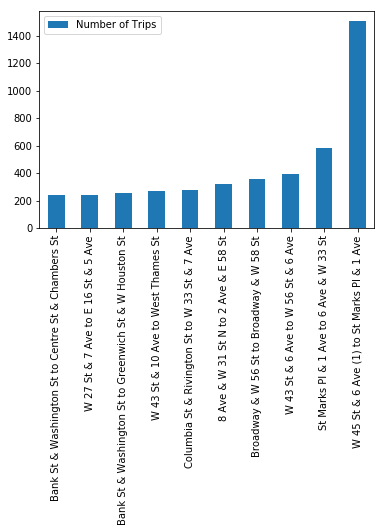

In [60]:
data_merged.sort_values(by = 'Number of Trips')[-10:].plot(kind='bar')
plt.xticks(np.arange(len(data_merged.sort_values(by = 'Number of Trips')[-10:]['trips'])), data_merged.sort_values(by = 'Number of Trips', ascending = False)[-10:]['trips'])

In [ ]:
#QUESTION 4

In [27]:
#to account for missing birthyears, this function takes the average birth years based on the neighborhood demographic, based on start location, and assigns them to that value.
df['birth year'] = df.groupby(['gender','start station id'])['birth year'].transform(lambda x: x.fillna(x.median()))

In [28]:
#removes unlikely ages for people riding citi bikes which could be false data
df = df.drop(df.index[(df['birth year'] < df['birth year'].mean()-(2*df['birth year'].std()))])

In [30]:
#creates an easy to read axis
df['age'] = 2018 - df['birth year'];
#df['age'] = df['age'].astype(int);

In [31]:
#calculates trip distance in miles
dist = []
for i in range(len(df)):
    dist.append(gp.distance.vincenty(df.iloc[i]['start station latitude', 'start station longitude'],df.iloc[i]['end station latitude', 'end station longitude']).miles)
    if (i%1000000==0):
        print(i)

KeyError: ('start station latitude', 'start station longitude')

In [32]:
#speed in miles per hour
df['mile_hour'] = round(df['Distance']/(df['Minutes']/60),2)

KeyError: 'Distance'

In [34]:
#accounts for circular trips where the rider starts and ends the journey at the same station
df = df.drop(df.index[(df['distance'] == 0)])

KeyError: 'distance'

In [ ]:
#Question 5
#how do I just display a table with the number one bike?

In [53]:
#To identify the busiest bike used, I am using a groupby function based on bikeid that I then sort by the number of times used.
bike_use_df = df.groupby(['bikeid']).size().reset_index(name = 'Number of Times Used');
bike_use_df = bike_use_df.sort_values('Number of Times Used', ascending = True);

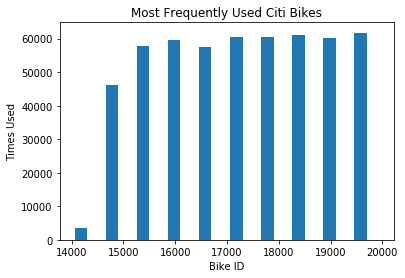

In [54]:
#ploting data from above
bike = df['bikeid']
times = bike_use_df['Number of Times Used']
plt.hist([bike, times], range = [14000,20000])
plt.xlabel("Bike ID")
plt.ylabel("Times Used")
plt.title('Most Frequently Used Citi Bikes')
plt.show()

In [7]:
#pivot = bike_use_df.pivot_table(values=[bike], index=[time], aggfunc=np.mean)


NameError: name 'bike_use_df' is not defined

In [12]:
#last question
#incorporating seasonality into model
def get_date_info(df):
    df['d_week'] = df['Start Time'].dt.dayofweek
    df['m_yr'] = df['Start Time'].dt.month
    df['ToD'] = df['Start Time'].dt.hour

    df['d_week'] = (df['d_week']<5).astype(int)

    df['m_yr'] = df['m_yr'].replace(to_replace=[12,1,2], value = 0)
    df['m_yr'] = df['m_yr'].replace(to_replace=[3,4,5], value = 1)
    df['m_yr'] = df['m_yr'].replace(to_replace=[6,7,8], value = 2)
    df['m_yr'] = df['m_yr'].replace(to_replace=[9,10,11], value = 3)
    
    df['ToD'] = pd.cut(df['ToD'], bins=[-1, 5, 9, 14, 20, 25], labels=['Night','Morning','Afternoon','Evening','Night1'])
    df['ToD'] = df['ToD'].replace(to_replace='Night1', value = 'Night')
    df['ToD'] = df['ToD'].cat.remove_unused_categories()
    
    df['m_yr'] = df['m_yr'].astype('category')
    df['d_week'] = df['d_week'].astype('category')

    return df

In [14]:
#geting the average duration of trips based on user type
def get_speed_distance(df):

    df['Start Station Name'] = df['Start Station Name'].astype(str)
    df['End Station Name'] = df['End Station Name'].astype(str)
    df['Trip'] = df['Start Station Name'] + ' to ' + df['End Station Name']
    df['Trip'] = df['Trip'].astype('category')
    
    df['avg_speed'] = df.groupby(['Trip','User Type'])['mile_hour'].transform('mean')
    df['avg_duration'] = df.groupby(['Trip','User Type'])['Trip Duration'].transform('median')
    
    return df

In [62]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,695,6/1/13 0:00,6/1/13 0:11,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,6/1/13 0:00,6/1/13 0:11,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
2,2059,6/1/13 0:00,6/1/13 0:35,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0
3,123,6/1/13 0:01,6/1/13 0:03,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,6/1/13 0:01,6/1/13 0:26,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1


In [72]:
#creating dummy variable for usertype
#for i in [0,len(df[['usertype']])]:
 #   if df[['usertype']][i]=='Customer':
  #      df[['usertype']][i] = 1
   # else:
    #    df[['usertype']][i] = 0
#df[['usertype']].head()
dummy = df.get_dummies(df['usertype'])
dummy.head()

AttributeError: 'DataFrame' object has no attribute 'get_dummies'

In [75]:
#running OLS regression to see the effect of variables, add and removing as dictated by the greatest R squared value.
X = df[['start station name','starttime','stoptime','end station name','bikeid', 'birth year', 'gender']]
y = df[['tripduration']].astype(float)
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
pd.get_dummies(pd.DataFrame({['usertype']}))
print(print_model)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).